## CIS 3902 Data Wrangling Exericse

Datasets need to be in the right format before analysts can start drawing meaningful conclusions.  The process of preparing data for analysis is called __data wrangling__, and often takes the bulk of an analysts' time during a data project.  Possible issues might include:

* Missing data or problematic/incorrect values in a dataset;
* Data are formatted incorrectly, preventing the analyst from working with the data in the right way;
* Data are spread across multiple files or data tables;
* Data are in the wrong "shape" for analysis and visualization
* All of the above, in varying capacities!

A major reason why you are learning to work with `pandas` in this course is because it can flexibly handle all of these tasks.  In this notebook, we'll be going over some basic examples of how this works, which you'll then put into practice with the Exercises at the end.  

In this notebook, we'll be working primarily with the US Department of Education's College Scorecard dataset. Read in the full dataset with the code below.

In [1]:
import pandas as pd
full_url = 'https://raw.githubusercontent.com/catawba-data-mining/CIS-3902-Data-Mining/main/colleges.csv'
full = pd.read_csv(full_url, encoding = 'latin_1')
full.shape

(7804, 122)

We see that our data have over 7800 rows, and a whopping 122 columns!  At this point, while you might not know yet what insights are contained in the data, you will have some sense of the research questions that you are interested in.  As your research questions don't likely require all 122 columns, you can safely restrict your dataset to only those columns that you need for your analysis.  Our core research question is as follows:

* How does the proportion of non-traditional students - defined as undergraduate students aged 25 and above - vary among comparable bachelor's-granting colleges and universities?  

To accomplish this, we'll need to identify some columns that we need and subset our data accordingly.  The columns we'll be keeping are as follows:

* `INSTNM`: The name of the institution;
* `STABBR`: The state the institution is located in;
* `PREDDEG`: The primary type of degree granted by the institution; codes include 1 for certificates, 2 for associate's degrees, 3 for bachelor's degrees, and 4 for graduate degrees;
* `CONTROL`: The ownership of the institution, coded as 1 for public non-profit, 2 for private non-profit, and 3 for private for-profit;
* `UGDS`: The number of undergraduates enrolled at the institution;
* `UG25abv`: The percentage of undergraduates at the institution aged 25 and above.  

## Subsetting data

As we discussed in class, `pandas` includes many different methods for subsetting data; I encourage you to review the corresponding lecture notes for the full set of methods that we discussed.  In this notebook, we'll be focusing on the methods that allow us to accomplish the task at hand, and you'll be learning a few new methods as well.  

To subset our data column-wise, we can specify a list of column names that we want to keep then use the `.filter()` method to restrict our data to only those specified columns.  

In [2]:
keep = ['INSTNM', 'STABBR', 'PREDDEG', 'CONTROL', 'UGDS', 'UG25abv']

df = full.filter(keep)

df.head()

,INSTNM,STABBR,PREDDEG,CONTROL,UGDS,UG25abv
0,Alabama A & M University,AL,3,1,4051.0,0.1049
1,University of Alabama at Birmingham,AL,3,1,11200.0,0.2422
2,Amridge University,AL,3,2,322.0,0.8540
3,University of Alabama in Huntsville,AL,3,1,5525.0,0.2640
4,Alabama State University,AL,3,1,5354.0,0.1270


Our data are much simpler to work with now!  We can already see some noticeable variations in the data; over 85 percent of students at Amridge University are over age 25; however, the university itself is quite small with only 322 undergraduates.  These are the types of things we'll want to account for in our analysis.  

You may have noticed that result of the subsetting operation is assigned to a new data frame.  You can assign the result back to the original frame:

```python
full = full.filter(keep)
```

Or:

```python
full.filter(keep, inplace = True)
```

A personal preference when doing data programming is to assign the results of major operations to new data frames, creating a data frame object that represents each step of the analysis, and do minor operations in place.  For example, had the results been assigned by the results of the subsetting operation back to `full`, and you later decided that you needed an additional column from the original data frame, you would need to read the whole thing in again rather than just add a column name to the list `keep`.  Python will hold all of our data _in memory_, so it will be accessible to us throughout our Python session; given that our data are relatively small, this won't cause us any problems.  Bigger data workflows might require different methods, however.  
There are small things, however, that you can do to your data frame in place to make your lives easier.  For example,you don't really want to hit Caps Lock or the Shift key every time you are typing out column names, but your column names are capitalized.  Our column names in our data frame are simply a list of strings, which we've learned how to work with already with string methods. As such, we can use __list comprehension__ to convert all of the column names to lower case:

In [3]:
df.columns = [x.lower() for x in df.columns]

df.head()

,instnm,stabbr,preddeg,control,ugds,ug25abv
0,Alabama A & M University,AL,3,1,4051.0,0.1049
1,University of Alabama at Birmingham,AL,3,1,11200.0,0.2422
2,Amridge University,AL,3,2,322.0,0.8540
3,University of Alabama in Huntsville,AL,3,1,5525.0,0.2640
4,Alabama State University,AL,3,1,5354.0,0.1270


You've also already learned to modify the column names of your data frame by passing in a list of new names. Individual names can be modified as well.  For example,'state'` makes a lot more sense as a column name than `'stabbr'`, so I'm going to change it.  The following code gets this done:

In [4]:
df.rename(columns = {'stabbr': 'state'}, inplace = True)

df.head()

,instnm,state,preddeg,control,ugds,ug25abv
0,Alabama A & M University,AL,3,1,4051.0,0.1049
1,University of Alabama at Birmingham,AL,3,1,11200.0,0.2422
2,Amridge University,AL,3,2,322.0,0.8540
3,University of Alabama in Huntsville,AL,3,1,5525.0,0.2640
4,Alabama State University,AL,3,1,5354.0,0.1270


The `rename` data frame method takes a __dictionary__ of values, which is a Python data structure that we haven't discussed yet.  Dictionaries, or `dict` objects as they are often called, are enclosed by curly braces (`{}`) and are made up of __key/value pairs__.  In turn, they can really come in handy when working with paired values; we may return to them later in the semester.  As this is a minor change to the data frame, the argument `inplace = True` makes sense to modify `df` directly.  

We now want to subset our data even further.  As mentioned above, the `preddeg` column designates the primary degree granted by the colleges and universities in the dataset.  We're interested in comparing primarily bachelor's-granting universities, which have the code of `3`; in turn, we want to tell `pandas` to keep only those rows where the `preddeg` column is equal to 3.  First, let's check our `dtypes` to see if the columns is formatted as a string or number:

In [5]:
df.dtypes

instnm      object
state       object
preddeg      int64
control      int64
ugds       float64
ug25abv    float64
dtype: object

It appears as though `preddeg` is an integer, so we will work with the values as numbers.  To subset rows in __pandas__, we can use the `.query()` data frame method.  `.query()` requires an __expression__ to be evaluated by Python using boolean/logical operators.  The method will then return those rows for which the result of the expression is `True`, and drop those rows that return `False`.  In this case, we want all of those rows for which the value of the `preddeg` column is equal to 3.  Let's create a new dataframe, called `ug` for undergraduate, from this expression.  

In [6]:
ug = df.query('preddeg == 3')

ug.shape

(2133, 6)

We've gone from over 7800 colleges & universities down to 2133.  

### Missing data

As mentioned in class, missing data in __pandas__ are designated with the value `NaN`, which refers to "not a number."  Data analysts need to take missing data seriously, as they could be representative of a systematic flaw in the dataset.  You can check for missing values in __pandas__ with the `.isnull()` method.  Let's query our undergradate data frame to check to see how many rows in our dataset have missing values for our column of interest, `ug25abv`.  Note that we need the argument `engine = 'python'` in this example as we are using a __pandas__ method within the expression.  

In [7]:
ugnull = ug.query('ug25abv.isnull()', engine = 'python')

ugnull.shape

(36, 6)

It looks like we have 36 rows with null values for the `ug25abv` column.  Let's see what universities they are:

In [8]:
ugnull

,instnm,state,preddeg,control,ugds,ug25abv
104,Frank Lloyd Wright School of Architecture,AZ,3,2,2.0,NaN
649,Yeshiva Ohr Elchonon Chabad West Coast Talmudi...,CA,3,2,131.0,NaN
1171,Rosalind Franklin University of Medicine and S...,IL,3,2,NaN,NaN
1893,New England College of Optometry,MA,3,2,NaN,NaN
2598,Beth Hatalmud Rabbinical College,NY,3,2,47.0,NaN
2599,Beth Hamedrash Shaarei Yosher Institute,NY,3,2,49.0,NaN
2668,Yeshiva of Far Rockaway Derech Ayson Rabbinica...,NY,3,2,57.0,NaN
2707,Kehilath Yakov Rabbinical Seminary,NY,3,2,120.0,NaN
2733,Mesivtha Tifereth Jerusalem of America,NY,3,2,50.0,NaN
2767,Ohr Hameir Theological Seminary,NY,3,2,94.0,NaN


Interesting!  It looks like primarily we've returned Jewish _yeshivas_ as well as a few graduate colleges - e.g. New England College of Optometry which is designated as a bachelor's granting institution but has no undergraduates - that appear to have been mis-coded.  This reveals why careful inspection of your data is important.  Missing values often aren't at random, but instead may be systematic or clustered amongst a particular type of record in your dataset.  Additionally, it looks like we've uncovered some errors in the original data as well.   

In this case, let's go ahead and drop these records from our dataset.  Recall from class that there are other options available for missing data as well; you can __fill__ the `NaN` values with some other value if appropriate, such as `0` or the mean of the column.  We'll drop these values using `.query()` again, but instead with the `.notna()` __pandas__ method.  This method will identify the rows that are _not_ `NaN` in the `ug25abv` column, and retain only those rows.  

In [9]:
ug_nonull = ug.query('ug25abv.notna()', engine = 'python')

ug_nonull.shape

(2097, 6)

I can also use the `.dropna()` method, which we learned in class.  One thing about `.dropna()` is that it can operate over the entire data frame if we don't pass it any columns.  Let's check it out:

In [10]:
ug1 = ug.dropna()

ug1.shape

(2097, 6)

We get the same result, which means that we've also removed any of the rows that had null values in the `ugds` column.  

## Group-wise data analysis

In class, we discussed the "split-apply-combine" approach to data analysis.  This approach involves:

1. __Splitting__ the data into groups based on some common characteristic;
2. __Applying__ some function to each group;
3. __Combining__ the results back into a single dataset, allowing for group-wise comparisons.  

While conceptually simple, this approach to data analysis is extraordinarily powerful - and extremely common!  For example, let's say you are working in analytics for a business, and your supervisor wants you to compare sales results of your stores by region.  This is a very common request when working with data professionally, and fortunately __pandas__ can help you out with this with minimal code.  

Let's start with a couple guiding questions.  

1. How does the proportion of undergraduate students above age 25 vary among public, private, and for-profit universities?  
2. How does the proportion of undergraduate students above age 25 vary by institution size?  

Group-wise data analysis in __pandas__ is conducted by the creation of a `groupby` object, in which you tell `pandas` exactly how the data should be grouped.  To address the first question, we'll want to group our data by institution type.  The code below gets this done.  

In [11]:
groups1 = ug1.groupby('control')

type(groups1)

pandas.core.groupby.generic.DataFrameGroupBy

Notice the object `type` - Python knows that our new object, `groups1`, represents grouped data.  In turn, anything we calculate over this object will apply to each of our groups, defined by unique values of the `control` column.  Let's try:  

In [12]:
groups1.ug25abv.mean()

control
1    0.215475
2    0.235799
3    0.670381
Name: ug25abv, dtype: float64

Interesting stuff - whereas public and private non-profit colleges and universities are pretty similar in their age composition, with 21-23 percent of their student bodies above age 25, private for-profit universities are quite different, with over two-thirds of their undergraduates aged over 25.  

Let's visualize this with `seaborn`, which also sets up very nicely for group-wise data analysis.  Box plots and violin plots, for example, can be extended by specifying a second column for the plot.  

<Axes: xlabel='control', ylabel='ug25abv'>

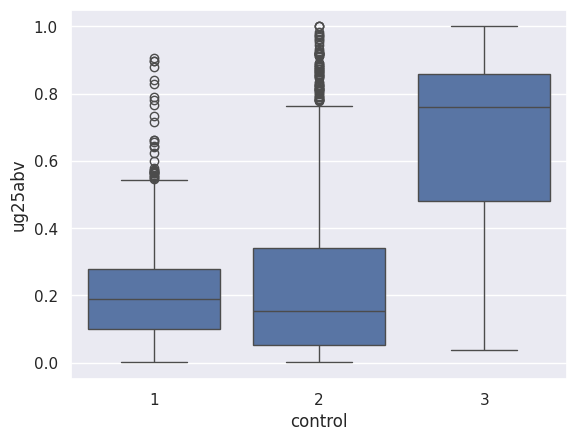

In [13]:
import seaborn as sns
sns.set(style = "darkgrid")

sns.boxplot(data = ug1, x = 'control', y = 'ug25abv')

We can get a clear sense here of the variations of the distributions between the groups.  While the mean percentage of undergraduates above 25 at public non-profits was below that of private non-profits, it appears as though the median for private non-profits is lower; there is simply a longer tail of private non-profits with large proportions of their student bodies above 25.  For private for-profits, the distribution is quite evident - with the median value above 70 percent.  

`seaborn` includes even more functionality for group-wise visualization - incorporating, in some instances, multiple groups!  We'll learn more about this in a couple weeks when we focus on data visualization; however we can take a look right now.  The `catplot` function in `seaborn` allows you to split categorical plots such as point (the default), box, violin, bar, or strip plots into separate smaller charts, to facilitate comparisons across groups.  

Let's create a new subsetted data frame, `sub1`, by indexing our `ug1` data frame for only those colleges and universities that are located in New York, Texas, and California.  We then call the `catplot` function, specifying how to divide our plots into __small multiples__ with the `col = 'state'` argument.

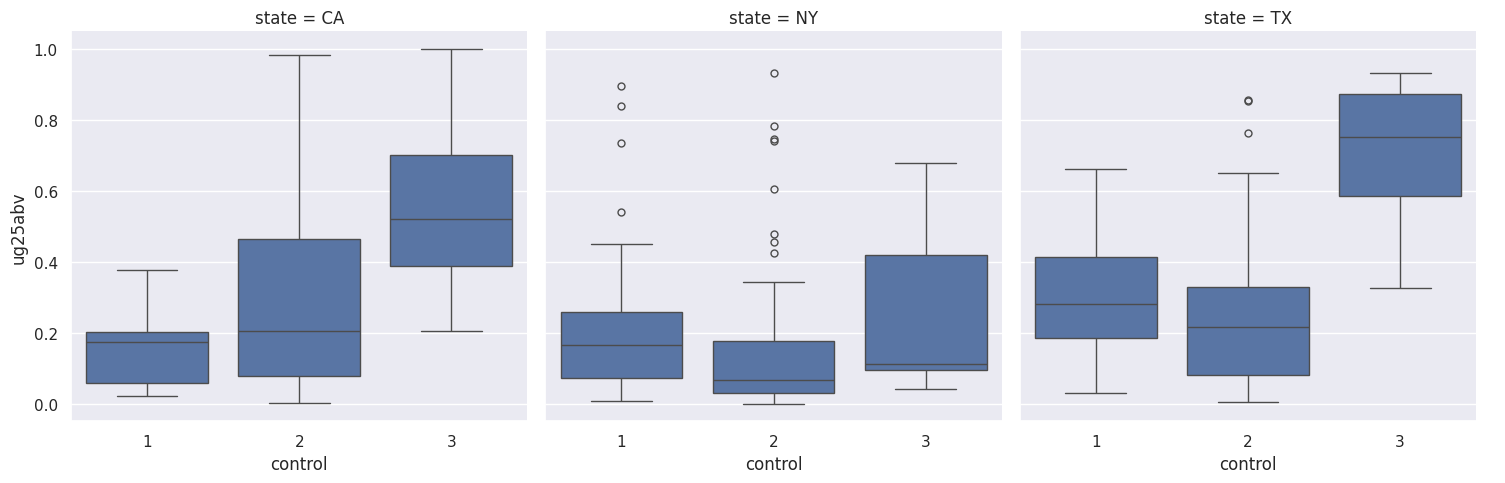

In [14]:
sub1 = ug1.query("state in ['NY', 'TX', 'CA']", engine = 'python')

sns.catplot(data = sub1, x = 'control', y = 'ug25abv',
               col = 'state', kind = 'box', order = [1, 2, 3])

Now, we want to look at how the percentage of undergraduates over age 25 varies by institution size.  Certainly, we could create a scatter plot as both the `ug25abv` and `ugds` columns are numeric:  

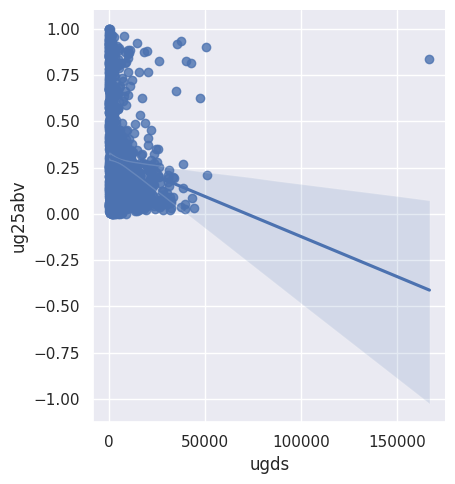

In [15]:
sns.lmplot(data = ug1, x = 'ugds', y = 'ug25abv')

The regression line suggests an inverse relationship; however the clustering of dots suggests (potentially) a non-linear relationship, and there are several outliers.  For example:  

In [16]:
ug1.query('ugds > 150000')

,instnm,state,preddeg,control,ugds,ug25abv
4880,University of Phoenix-Online Campus,AZ,3,3,166816.0,0.8368


The University of Phoenix-Online, with over 160,000 students, stands out as a distinct outlier.  Additionally, a scatter plot is not the only way that we can assess this relationship.  We can convert our data from quantitative to categorical, and in turn assess variations amongst the categories.  

### Creating new columns

Creating a categorical column from a quantitative column requires computing a new column in our data frame, which will be a common part of your workflow in __pandas__.  As you learned in class, you can use basic mathematical operations to create new columns from existing ones.  In this example, we are going to organize our universities into __bins__ based on their size, and then compare universities across those bins.  

__pandas__ includes a lot of methods for creating new columns; we're going to discuss here options for organizing our data into bins.  The three options are as follows:

* Equal interval: all bins have the same width, regardless of the number of observations in each bin.  
* Manual breaks: the analyst specifies where the bin breaks should be located
* Quantile: An equal number of observations are organized into a specified number of bins; bins widths will in turn be irregular.  

Equal interval and manual breaks are available via the `cut()` function in __pandas__; quantiles are available from the `qcut()` function.  Let's create a new column with the `.assign()` method that organizes the values in `ugds` into five quantiles, labeled with 1 through 5 which we accomplish with `range()`:

In [17]:
ug_quantiles = ug1.assign(quant5 = pd.qcut(ug.ugds, 5, labels = range(1, 6)))

ug_quantiles.head()

,instnm,state,preddeg,control,ugds,ug25abv,quant5
0,Alabama A & M University,AL,3,1,4051.0,0.1049,4
1,University of Alabama at Birmingham,AL,3,1,11200.0,0.2422,5
2,Amridge University,AL,3,2,322.0,0.8540,1
3,University of Alabama in Huntsville,AL,3,1,5525.0,0.2640,4
4,Alabama State University,AL,3,1,5354.0,0.1270,4


We can now make comparisons by quantile if we want.  Let's try a bar chart; `seaborn`'s `barplot` function will calculate group means and plot them, and give us an indication of the uncertainty around that mean with an error bar:

<Axes: xlabel='ug25abv', ylabel='quant5'>

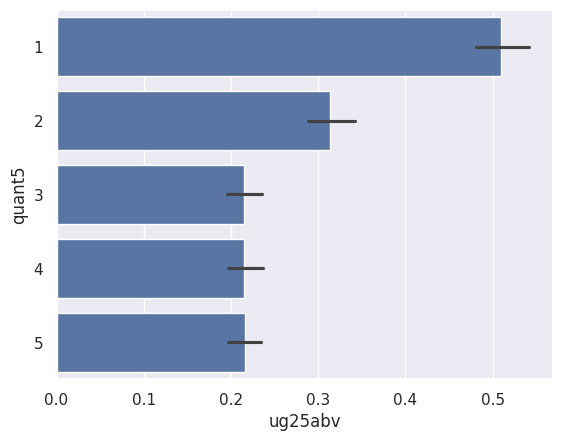

In [18]:
sns.barplot(x = 'ug25abv', y = 'quant5', data = ug_quantiles)

We can analyze this further by breaking out the bar charts by college type with `sns.catplot()`:

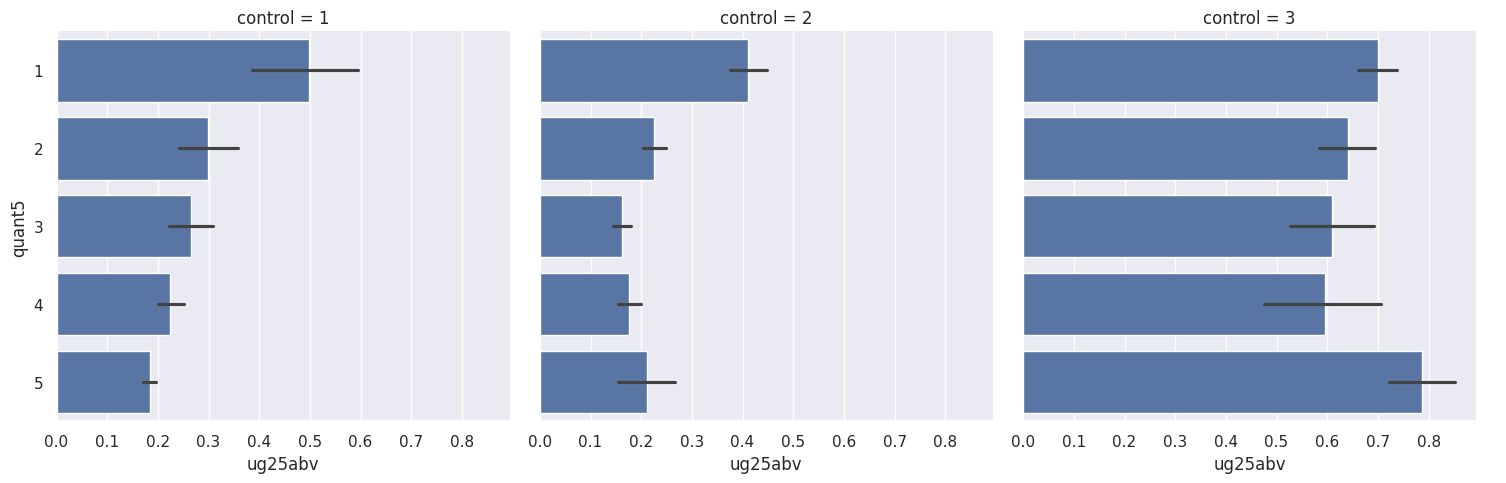

In [19]:
sns.catplot(data = ug_quantiles, x = 'ug25abv', y = 'quant5', col = 'control', kind = 'bar')

Our results appear quite different when we break them out by college type!  This starts to reveal the importance of detailed investigation of your data through visualization; we'll be exploring this much more in the next few weeks.  We can also take a look at the numbers behind these plots by creating a `groupby` object that groups by `control` and the quantiles:

In [20]:
groups2 = ug_quantiles.groupby(['control', 'quant5'])

groups2.ug25abv.mean()

control  quant5
1        1         0.498289
         2         0.298886
         3         0.265841
         4         0.224723
         5         0.183518
2        1         0.410560
         2         0.225184
         3         0.162080
         4         0.176742
         5         0.210676
3        1         0.701017
         2         0.641752
         3         0.610130
         4         0.594723
         5         0.787532
Name: ug25abv, dtype: float64

## Exercises

You'll now complete some exercises so you can practice what you've learned.  Your job, in general, is to replicate the analysis above, but for a different column in the dataset.  You'll be analyzing the column `PCTPELL`, which denotes the percentages of students receiving Pell Grants, a federal grant program to help students pay for college.  Unlike loans, Pell Grants do not need to be repaid.  

While you'll be using a lot of the code I provided for you and modifying it slightly, make sure that you know what the code is doing at every step!

---

__Exercise 1__:  Similar to what you did earlier in the notebook, create a data frame that is subsetted for the columns `'INSTNM', 'STABBR', 'PREDDEG', 'CONTROL', 'UGDS',` and `'PCTPELL'`, and that retains only those rows where `PREDDEG` is equal to `3`, representing primarily bachelor's-granting universities.  What is the mean, median, maximum value, and minimum value of the `PCTPELL` column?  

In [23]:
# Define the columns to keep
keep = ['INSTNM', 'STABBR', 'PREDDEG', 'CONTROL', 'UGDS', 'PCTPELL']

# Filter the full dataframe
df_pell = full.filter(keep)

# Subset the data for primarily bachelor's-granting universities (PREDDEG == 3)
df_pell = df_pell[df_pell['PREDDEG'] == 3]

# Display basic statistics for the PCTPELL column
print("Mean:", df_pell['PCTPELL'].mean())
print("Median:", df_pell['PCTPELL'].median())
print("Maximum value:", df_pell['PCTPELL'].max())
print("Minimum value:", df_pell['PCTPELL'].min())


Mean: 0.41885187793427237
Median: 0.3943
Maximum value: 1.0
Minimum value: 0.0


__Exercise 2:__ How many null values are contained in the `PCTPELL` column in your subsetted data frame?  Once you've found this out, drop them from your data frame.  

In [24]:
# Check for null values in the PCTPELL column
null_count = df_pell['PCTPELL'].isnull().sum()
print("Number of null values in PCTPELL column:", null_count)

# Drop null values from the dataframe
df_pell = df_pell.dropna(subset=['PCTPELL'])


Number of null values in PCTPELL column: 3


__Exercise 3:__ Compare the means of `PCTPELL` by the different groups of `CONTROL` (the college/university type).  Draw a visualization that shows how the distributions vary.  

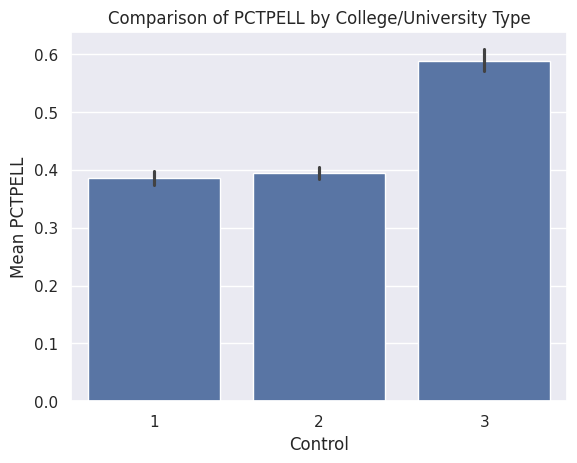

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compare means of PCTPELL by CONTROL groups
sns.barplot(x='CONTROL', y='PCTPELL', data=df_pell)
plt.title('Comparison of PCTPELL by College/University Type')
plt.xlabel('Control')
plt.ylabel('Mean PCTPELL')
plt.show()


__Exercise 4:__ Draw a visualization that breaks your visualization from Exercise 3 down by state with `catplot`, similar to what you did earlier in the notebook; in this instance, however, compare Texas with Florida and Illinois.  

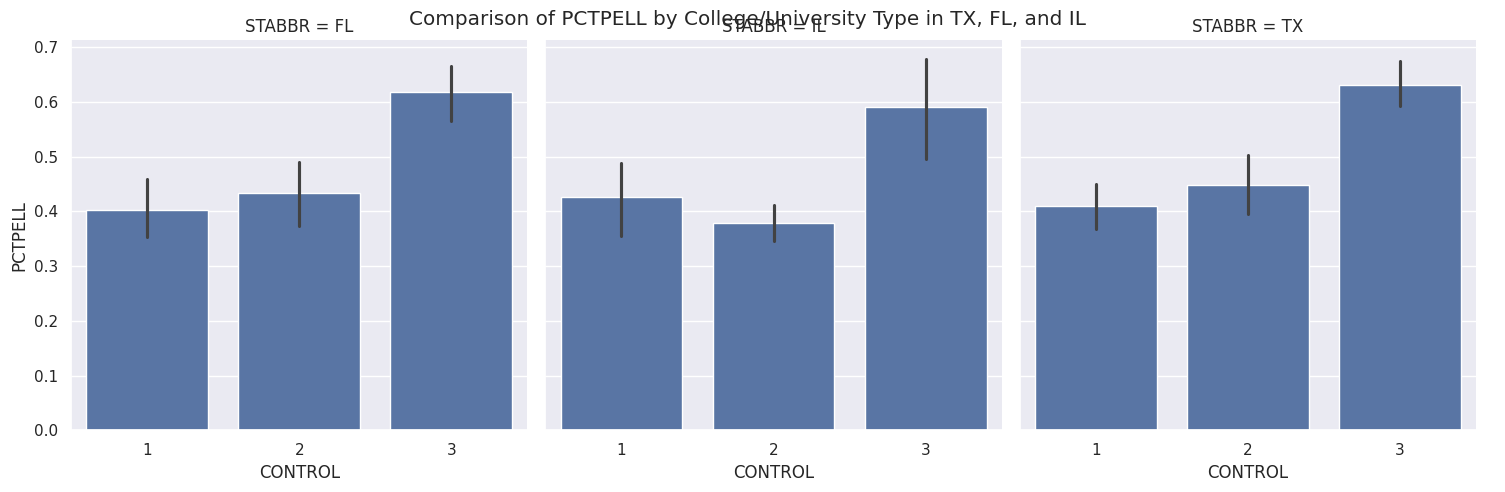

In [26]:
# Subset data for Texas, Florida, and Illinois
sub_states = df_pell[df_pell['STABBR'].isin(['TX', 'FL', 'IL'])]

# Draw catplot
sns.catplot(data=sub_states, x='CONTROL', y='PCTPELL', col='STABBR', kind='bar')
plt.suptitle('Comparison of PCTPELL by College/University Type in TX, FL, and IL')
plt.show()


__Exercise 5__: Show how the percent of students receiving Pell Grants varies by institution size and institution type (public, private, for-profit).  Break up the `UGDS` column into five quantiles in your data frame as you did before, and then compare the means of `PCTPELL` by institution type by institution size.  Draw a visualization with `catplot` to show this graphically.  

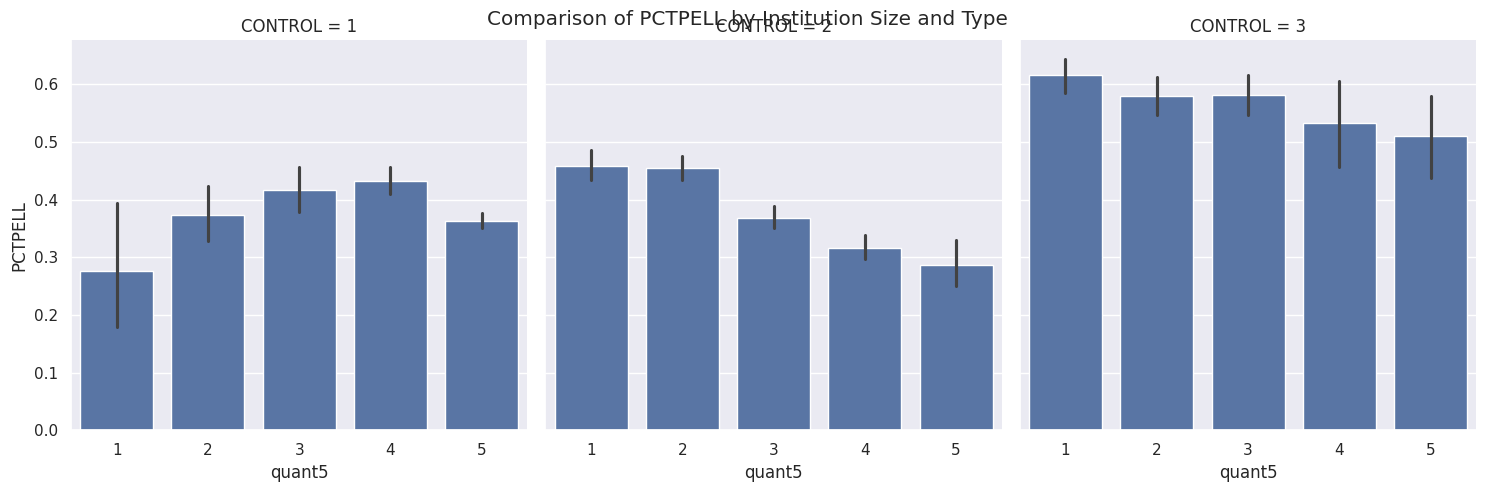

In [27]:
# Create quantiles for UGDS column
df_pell['quant5'] = pd.qcut(df_pell['UGDS'], 5, labels=range(1, 6))

# Draw catplot
sns.catplot(data=df_pell, x='quant5', y='PCTPELL', col='CONTROL', kind='bar')
plt.suptitle('Comparison of PCTPELL by Institution Size and Type')
plt.show()
